Import Necessary Packages
----------------------------------------

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [201]:
vehicle_df = pd.read_csv('vehicle.csv')

In [202]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [203]:
vehicle_df.shape

(846, 19)

In [204]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

# Q1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 
----------------------------

In [205]:
vehicle_df.isnull().sum() 

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [206]:
columns = vehicle_df.columns.tolist()

In [207]:
columns.remove('class')

In [208]:
columns

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']

In [209]:
vehicle_features_df = vehicle_df.drop('class', axis = 1)

In [210]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}<!--To Remove Horizontal Scrollbar-->

<IPython.core.display.Javascript object>

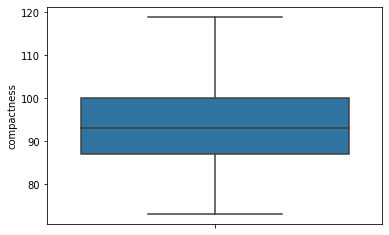

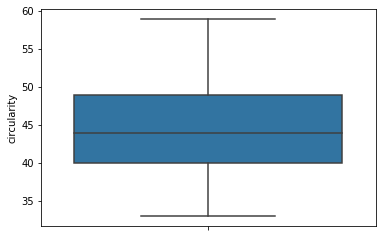

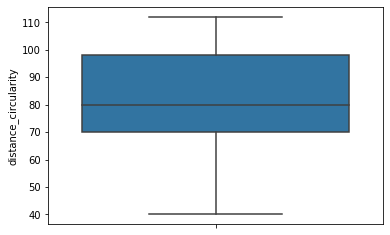

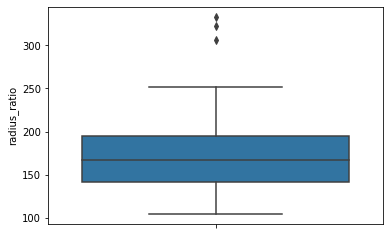

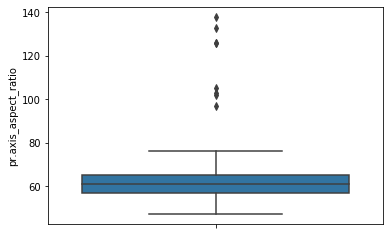

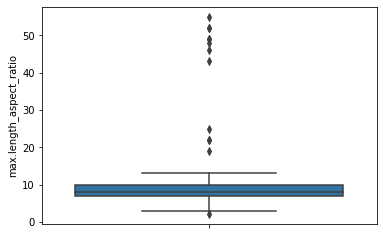

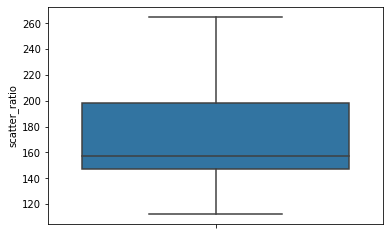

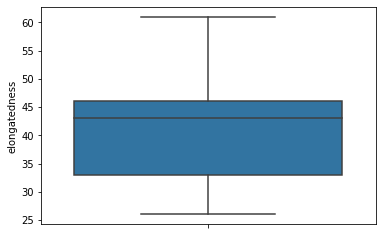

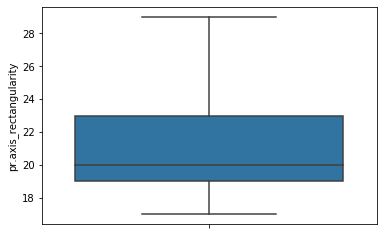

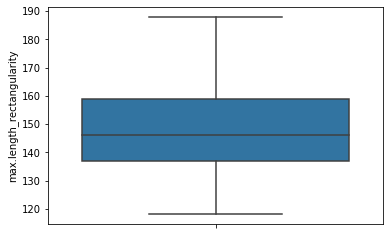

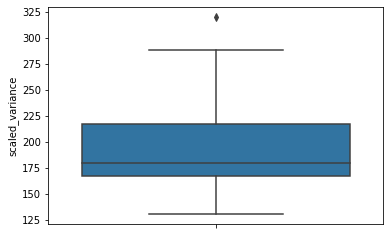

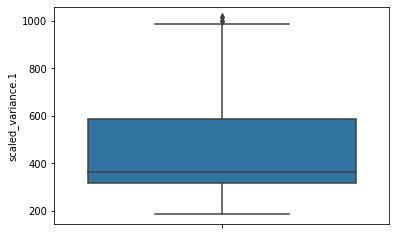

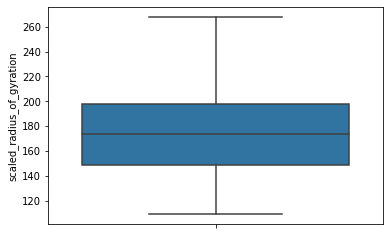

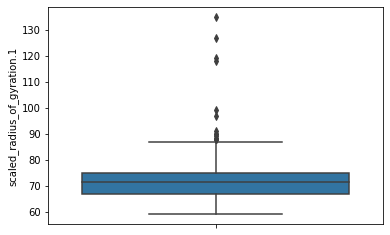

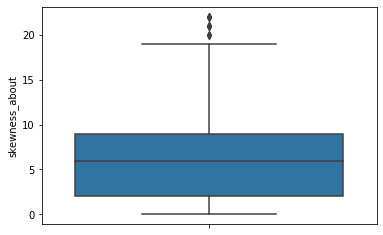

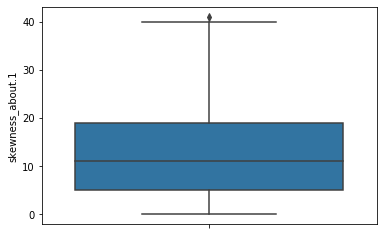

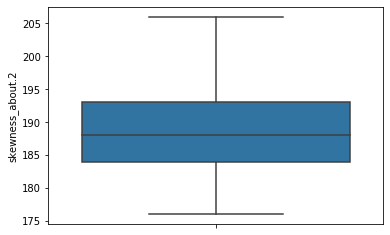

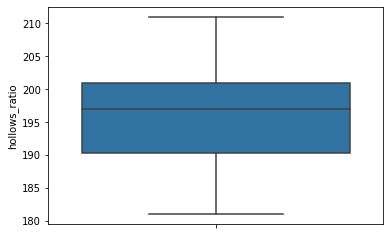

In [211]:
for colName in columns:
    sns.boxplot(y = vehicle_features_df[colName])
    plt.show()
   

Observations From Boxplot
----------------------------------------

1. From the boxplot, the following features have outlier data.

    a) radius_ratio
    
    b) pr.axis_aspect_ratio
    
    c) max.length_aspect_ratio
    
    d) scaled_variance
    
    e) scaled_variance 1
    
    f) scaled_radius_of_gyration.1
    
    g) skewness_about
    
    h) skewness_about.1
    
    
2. out of above features which are having outlier data, the following features have more number of outliers

    a) pr.axis_aspect_ratio
    
    b) max.length_aspect_ratio
    
    c) scaled_radius_of_gyration.1

# 5-Point Descriptive Statistics about the Data

In [212]:
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


Treating Missing Values --- Impute through Median
------------------------------------------------------------------------

In [213]:
cols_with_Missing_vals = [
                            'circularity',
                            'distance_circularity',
                            'radius_ratio',
                            'pr.axis_aspect_ratio',
                            'scatter_ratio',
                            'elongatedness',
                            'pr.axis_rectangularity',
                            'scaled_variance',
                            'scaled_variance.1',
                            'scaled_radius_of_gyration',
                            'scaled_radius_of_gyration.1',
                            'skewness_about',
                            'skewness_about.1',
                            'skewness_about.2'
                         ]

In [214]:
col_median_value = 0

for colName in cols_with_Missing_vals:
    col_median_value = vehicle_df[colName].median()
    vehicle_df[colName].fillna(col_median_value, inplace = True)
    

In [215]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Treating Outliers

In [216]:
 cols_with_outliers = [
                         'radius_ratio',
                         'pr.axis_aspect_ratio',
                         'max.length_aspect_ratio',
                         'scaled_variance',
                         'scaled_variance.1',
                         'scaled_radius_of_gyration.1',
                         'skewness_about',
                         'skewness_about.1'
                      ]

In [217]:
for colName in cols_with_outliers:
    print('****************************')
    print(colName)
    Q1 = vehicle_df[colName].quantile(0.25)
    
    Q3 = vehicle_df[colName].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - (1.5 * IQR)
    
    upper_limit = Q3 + (1.5 * IQR)
    
    filter1 = vehicle_df[colName] < lower_limit
    
    filter2 = vehicle_df[colName] > upper_limit
    
    print(vehicle_df[filter1 | filter2][colName])
    print('****************************')

****************************
radius_ratio
37     306.0
135    322.0
388    333.0
Name: radius_ratio, dtype: float64
****************************
****************************
pr.axis_aspect_ratio
4      103.0
37     126.0
100    126.0
135    133.0
291    102.0
388    138.0
523     97.0
706    105.0
Name: pr.axis_aspect_ratio, dtype: float64
****************************
****************************
max.length_aspect_ratio
4      52
37     49
100    52
127    22
135    48
291    43
388    49
391    25
523    46
544    19
655     2
706    55
815    22
Name: max.length_aspect_ratio, dtype: int64
****************************
****************************
scaled_variance
388    320.0
Name: scaled_variance, dtype: float64
****************************
****************************
scaled_variance.1
85      998.0
835    1018.0
Name: scaled_variance.1, dtype: float64
****************************
****************************
scaled_radius_of_gyration.1
4      127.0
37     118.0
47      88.0
79      

In [218]:
def returnLowerandUpperLimits(colName):
    Q1 = vehicle_df[colName].quantile(0.25)

    Q3 = vehicle_df[colName].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = vehicle_df[colName] < Q1 - (1.5 * IQR)

    upper_limit = vehicle_df[colName] > Q3 + (1.5 * IQR)
    
    return [lower_limit, upper_limit]
    

In [219]:
lstLimits = returnLowerandUpperLimits('radius_ratio')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,van
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,van
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,van


Observations
-------------------

1. All the outliers in radius_ratio are having target class value as 'van'

In [220]:
lstLimits = returnLowerandUpperLimits('pr.axis_aspect_ratio')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,van
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,bus
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,van
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,van
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,van
523,90,43.0,81.0,231.0,97.0,46,150.0,45.0,19.0,149,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196,van
706,82,43.0,70.0,250.0,105.0,55,139.0,48.0,18.0,145,231.0,289.0,172.0,99.0,4.0,9.0,190.0,199,van


Observations
-------------------

1. There are 8 outliers in pr.axis_aspect_ratio feature out of which 6 outliers are having target class as 'van' and the remaining two as 'bus'

2. All outliers in 'radius_ratio' are also outliers in 'pr.axis_aspect_ratio'

In [221]:
lstLimits = returnLowerandUpperLimits('max.length_aspect_ratio')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,van
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,bus
127,85,41.0,66.0,155.0,65.0,22,149.0,45.0,19.0,139,173.0,330.0,155.0,75.0,6.0,16.0,184.0,191,bus
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,van
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,van
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,van
391,91,38.0,70.0,160.0,66.0,25,140.0,47.0,18.0,139,162.0,296.0,130.0,67.0,4.0,11.0,192.0,202,van
523,90,43.0,81.0,231.0,97.0,46,150.0,45.0,19.0,149,200.0,332.0,164.0,91.0,5.0,9.0,186.0,196,van
544,88,43.0,70.0,177.0,74.0,19,152.0,44.0,19.0,143,180.0,342.0,168.0,76.0,1.0,9.0,186.0,189,bus


Observations
-------------------

1. There are 13 outliers in the max.length_aspect_ratio feature out of which 5 are having target class as 'bus' and the remaining have 'van'

2. All the outliers of pr.axis_aspect_ratio feature are also outliers in max.length_aspect_ratio feature.

In [222]:
lstLimits = returnLowerandUpperLimits('scaled_variance')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,van


Observations
-------------------

1. There is only one outlier in 'scaled_variance' feature which is having target class as 'van'

2. This outlier data is also outlier in features 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio'.

In [223]:
lstLimits = returnLowerandUpperLimits('scaled_variance.1')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
85,110,58.0,106.0,180.0,51.0,6,261.0,26.0,28.0,171,278.0,998.0,257.0,83.0,9.0,13.0,181.0,182,bus
835,111,58.0,105.0,183.0,51.0,6,265.0,26.0,29.0,174,285.0,1018.0,255.0,85.0,4.0,8.0,181.0,183,bus


Observations
-------------------

1. There are two outliers in scaled_variance.1 feature which are having target class as 'bus'.

2. These outliers in scaled_variance.1 feature are not outlier data in any one of above features 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance' outlier data

In [224]:
lstLimits = returnLowerandUpperLimits('scaled_radius_of_gyration.1')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
37,90,48.0,86.0,306.0,126.0,49,153.0,44.0,19.0,156,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194,van
47,85,42.0,66.0,122.0,54.0,6,148.0,46.0,19.0,141,172.0,317.0,174.0,88.0,6.0,14.0,180.0,182,bus
79,89,44.0,68.0,113.0,50.0,7,150.0,45.0,19.0,147,171.0,328.0,189.0,88.0,6.0,5.0,179.0,182,bus
100,82,45.0,66.0,252.0,126.0,52,148.0,45.0,19.0,144,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185,bus
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194,van
230,85,35.0,47.0,110.0,55.0,3,117.0,57.0,17.0,122,136.0,203.0,139.0,89.0,5.0,9.0,180.0,184,van
291,89,45.0,81.0,246.0,102.0,43,155.0,44.0,20.0,160,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192,van
381,106,54.0,100.0,227.0,67.0,4,250.0,27.0,27.0,162,280.0,923.0,262.0,88.0,5.0,11.0,182.0,182,bus
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196,van


Observations
-------------------

1. There are 15 outliers in scaled_radius_of_gyration.1 and all the outliers of pr.axis_aspect_ratio feature are also outliers in scaled_radius_of_gyration.1 feature 

2. The outliers are having target class as 'van' and 'bus'

In [225]:
lstLimits = returnLowerandUpperLimits('skewness_about')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
44,119,54.0,106.0,220.0,65.0,12,213.0,31.0,24.0,167,223.0,675.0,232.0,66.0,20.0,1.0,192.0,202,car
113,88,35.0,50.0,121.0,58.0,5,114.0,59.0,17.0,122,132.0,192.0,138.0,74.0,21.0,4.0,182.0,187,car
123,90,36.0,57.0,130.0,57.0,6,121.0,56.0,17.0,127,137.0,216.0,132.0,68.0,22.0,23.0,190.0,195,car
190,97,48.0,94.0,198.0,63.0,9,181.0,36.0,21.0,155,200.0,494.0,189.0,64.0,20.0,11.0,199.0,203,car
346,117,52.0,110.0,228.0,65.0,12,212.0,31.0,24.0,163,228.0,668.0,220.0,66.0,21.0,25.0,194.0,205,car
400,107,53.0,108.0,213.0,64.0,12,206.0,32.0,23.0,163,216.0,627.0,202.0,65.0,21.0,22.0,194.0,205,car
505,115,53.0,100.0,205.0,64.0,11,220.0,30.0,25.0,166,229.0,710.0,214.0,71.0,21.0,11.0,189.0,199,car
516,92,42.0,75.0,172.0,60.0,8,147.0,45.0,19.0,142,174.0,322.0,160.0,62.0,22.0,10.0,206.0,211,car
623,106,52.0,108.0,207.0,64.0,12,221.0,31.0,25.0,168,229.0,709.0,200.0,73.0,22.0,38.0,190.0,205,car
761,115,51.0,100.0,201.0,60.0,12,196.0,34.0,23.0,162,207.0,573.0,184.0,62.0,22.0,1.0,198.0,208,car


Observations
-------------------

1. There are 12 outliers in skewness_about and all the outliers are having target class 'car'.

2. None of above features are having outlier data related to target class 'car'.

3. No common outliers among 'skewness_about' feature and above outlier features

In [226]:
lstLimits = returnLowerandUpperLimits('skewness_about.1')

vehicle_df[lstLimits[0] | lstLimits[1]]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
132,97,42.0,101.0,186.0,59.0,9,186.0,36.0,22.0,138,208.0,511.0,168.0,67.0,7.0,41.0,194.0,206,car


Observations
-------------------

1. There is only one outlier and having target class 'car'.

Final Observations from Outlier Data
----------------------------------------------------

We can divide outlier data into 3 groups or clusters because the following

1. All or some outlier data of the features 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_radius_of_gyration.1' are same. Their target class is either 'van' or 'bus'

2. The outliers of feature 'scaled_variance.1' are different which are not common in any of outlier data of features in the above point even though their target class 'van'

3. The outliers of features 'skewness_about' and 'skewness_about.1' are related to target class 'car'

# Important Note Regarding Outlier Data

1. It is better to concern the domain expert regarding more information about outliers because there are 8 features which are having outliers in their data.

2. Out of 8 features, 6 features contains outlier data related to target class 'van' and 'bus'.

3. only 2 features contains outlier data related to the target class 'car'.

# Remove Outliers From the Dataset

In [227]:
for colName in cols_with_outliers:
    lstLimits = returnLowerandUpperLimits(colName)
    
    vehicle_df.drop(vehicle_df[lstLimits[0]].index, inplace = True)
    
    vehicle_df.drop(vehicle_df[lstLimits[1]].index, inplace = True)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [228]:
for colName in cols_with_outliers:
    print('****************************')
    print(colName)
    Q1 = vehicle_df[colName].quantile(0.25)
    
    Q3 = vehicle_df[colName].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - (1.5 * IQR)
    
    upper_limit = Q3 + (1.5 * IQR)
    
    filter1 = vehicle_df[colName] < lower_limit
    
    filter2 = vehicle_df[colName] > upper_limit
    
    print(vehicle_df[filter1 | filter2][colName])
    print('****************************')

****************************
radius_ratio
Series([], Name: radius_ratio, dtype: float64)
****************************
****************************
pr.axis_aspect_ratio
Series([], Name: pr.axis_aspect_ratio, dtype: float64)
****************************
****************************
max.length_aspect_ratio
Series([], Name: max.length_aspect_ratio, dtype: int64)
****************************
****************************
scaled_variance
Series([], Name: scaled_variance, dtype: float64)
****************************
****************************
scaled_variance.1
85    998.0
Name: scaled_variance.1, dtype: float64
****************************
****************************
scaled_radius_of_gyration.1
Series([], Name: scaled_radius_of_gyration.1, dtype: float64)
****************************
****************************
skewness_about
Series([], Name: skewness_about, dtype: float64)
****************************
****************************
skewness_about.1
Series([], Name: skewness_about.1, dtype: 

# Q2.  Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

Correlation
----------------

In [229]:
vehicle_df.shape

(814, 19)

In [230]:
corr_matrix = vehicle_df.corr()

In [231]:
corr_matrix

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.681044,0.787519,0.744988,0.195219,0.493490,0.811865,-0.789569,0.812848,0.675377,0.792579,0.813304,0.580272,-0.248127,0.201605,0.160805,0.291102,0.357820
circularity,0.681044,1.000000,0.787456,0.640063,0.200369,0.559433,0.844708,-0.816676,0.841103,0.961194,0.803987,0.833343,0.925560,0.071072,0.141572,-0.014187,-0.119834,0.034055
distance_circularity,0.787519,0.787456,1.000000,0.807813,0.241204,0.665476,0.905180,-0.908932,0.894333,0.769380,0.883668,0.887350,0.703466,-0.233796,0.099795,0.263208,0.126132,0.316998
radius_ratio,0.744988,0.640063,0.807813,1.000000,0.663959,0.459857,0.786966,-0.842934,0.761187,0.576593,0.789852,0.772698,0.549503,-0.401525,0.040580,0.187193,0.417262,0.502692
pr.axis_aspect_ratio,0.195219,0.200369,0.241204,0.663959,1.000000,0.140192,0.192396,-0.296353,0.162115,0.141809,0.206655,0.177662,0.146945,-0.327758,-0.052777,-0.028622,0.407950,0.422199
max.length_aspect_ratio,0.493490,0.559433,0.665476,0.459857,0.140192,1.000000,0.491181,-0.498454,0.490661,0.644389,0.405308,0.450648,0.399177,-0.334146,0.083155,0.140824,0.057981,0.395718
scatter_ratio,0.811865,0.844708,0.905180,0.786966,0.192396,0.491181,1.000000,-0.972064,0.989541,0.807396,0.977760,0.992962,0.796676,0.008521,0.065245,0.213297,-0.007570,0.108972
elongatedness,-0.789569,-0.816676,-0.908932,-0.842934,-0.296353,-0.498454,-0.972064,1.000000,-0.949733,-0.770845,-0.964510,-0.955176,-0.763655,0.082420,-0.046784,-0.183637,-0.101827,-0.205753
pr.axis_rectangularity,0.812848,0.841103,0.894333,0.761187,0.162115,0.490661,0.989541,-0.949733,1.000000,0.810569,0.964172,0.987856,0.794016,0.023944,0.074501,0.215662,-0.030947,0.090618
max.length_rectangularity,0.675377,0.961194,0.769380,0.576593,0.141809,0.644389,0.807396,-0.770845,0.810569,1.000000,0.750255,0.794090,0.867114,0.055864,0.135580,-0.002354,-0.119911,0.063293


In [232]:
#select the upper diagonal of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [233]:
upper

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,NaN,0.681044,0.787519,0.744988,0.195219,0.493490,0.811865,-0.789569,0.812848,0.675377,0.792579,0.813304,0.580272,-0.248127,0.201605,0.160805,0.291102,0.357820
circularity,NaN,NaN,0.787456,0.640063,0.200369,0.559433,0.844708,-0.816676,0.841103,0.961194,0.803987,0.833343,0.925560,0.071072,0.141572,-0.014187,-0.119834,0.034055
distance_circularity,NaN,NaN,NaN,0.807813,0.241204,0.665476,0.905180,-0.908932,0.894333,0.769380,0.883668,0.887350,0.703466,-0.233796,0.099795,0.263208,0.126132,0.316998
radius_ratio,NaN,NaN,NaN,NaN,0.663959,0.459857,0.786966,-0.842934,0.761187,0.576593,0.789852,0.772698,0.549503,-0.401525,0.040580,0.187193,0.417262,0.502692
pr.axis_aspect_ratio,NaN,NaN,NaN,NaN,NaN,0.140192,0.192396,-0.296353,0.162115,0.141809,0.206655,0.177662,0.146945,-0.327758,-0.052777,-0.028622,0.407950,0.422199
max.length_aspect_ratio,NaN,NaN,NaN,NaN,NaN,NaN,0.491181,-0.498454,0.490661,0.644389,0.405308,0.450648,0.399177,-0.334146,0.083155,0.140824,0.057981,0.395718
scatter_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.972064,0.989541,0.807396,0.977760,0.992962,0.796676,0.008521,0.065245,0.213297,-0.007570,0.108972
elongatedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.949733,-0.770845,-0.964510,-0.955176,-0.763655,0.082420,-0.046784,-0.183637,-0.101827,-0.205753
pr.axis_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.810569,0.964172,0.987856,0.794016,0.023944,0.074501,0.215662,-0.030947,0.090618
max.length_rectangularity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750255,0.794090,0.867114,0.055864,0.135580,-0.002354,-0.119911,0.063293


Observations
-------------------

1. Compactness is modelrately positively correlated with distance_circularity (0.787519), radius_ratio(0.744988), scatter_ratio(0.811865), pr.axis_rectangularity(0.812848), scaled_variance(0.792579), scaled_variance.1(0.813304).

2. Compactness is moderately negatively correlated with elongatedness (-0.789569).

3. circularity is moderatley positively correlated with distance_circularity(0.787456), scatter_ratio(0.844708), pr.axis_rectangularity(0.841103), scaled_variance(0.803987), scaled_variance.1(0.833343).

4. circularity is highly postively correlated with max.length_rectangularity (0.961194) and scaled_radius_of_gyration (0.925560)

5. distance_circularity is moderately positively correlated with radius_ratio (0.807813), pr.axis_rectangularity (0.894333),max.length_rectangularity (0.769380), scaled_variance(0.883668), scaled_variance.1(0.887350), scaled_radius_of_gyration(0.703466).

6. distance_circularity is highly positively correlated with scatter_ratio (0.905180), elongatedness (-0.908932)

7. radius_ratio is moderaltely positively correlated with scatter_ratio (0.786966), pr.axis_rectangularity (0.761187), scaled_variance (0.789852), scaled_variance.1 (0.772698).

8. radius_ratio is moderately negatively correlated with elongatedness (-0.842934)

9. scatter_ratio is highly negatively correlated with elongatedness (-0.972064)

10. scatter_ratio is highly positively correlated with pr.axis_rectangularity (0.989541), scaled_variance (0.977760), scaled_variance.1 (0.992962)

11. elongatedness is highly negatively correlated with pr.axis_rectangularity (-0.949733), scaled_variance (-0.964510), scaled_variance.1 (-0.955176)

12. pr.axis_rectangularity is highly positively correlated with scaled_variance (0.964172), scaled_variance.1 (0.987856)

13. scaled_variance is highly positively correlated with scaled_variance.1 (0.975800)

14. skewness_about.2 is moderately positively correlated with hollows_ratio (0.890104)

Encode the Target Class Variable
------------------------------------------------

In [234]:
le = LabelEncoder()

vehicle_df['class'] = le.fit_transform(vehicle_df['class'])

vehicle_df['class'].unique()

array([2, 1, 0], dtype=int64)

Feature Selection
-------------------------

Forward Selection
--------------------------

In [235]:
knn_Model = KNeighborsClassifier(n_neighbors = 3)

In [236]:
sfs1 = SFS(knn_Model, 
           k_features=18, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=4)

In [237]:
X = vehicle_df.drop('class', axis = 1)

y = vehicle_df['class']

In [238]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.9s finished

[2020-01-04 14:54:13] Features: 1/18 -- score: 0.640087708758861[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.8s finished

[2020-01-04 14:54:14] Features: 2/18 -- score: 0.8070707677520125[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.8s finished

[2020-01-04 14:54:15] Features: 3/18 -- score: 0.861233930073291[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [239]:
sfs1.subsets_

{1: {'feature_idx': (7,),
  'cv_scores': array([0.62439024, 0.65024631, 0.67980296, 0.60591133]),
  'avg_score': 0.640087708758861,
  'feature_names': ('elongatedness',)},
 2: {'feature_idx': (5, 7),
  'cv_scores': array([0.82926829, 0.78325123, 0.76847291, 0.84729064]),
  'avg_score': 0.8070707677520125,
  'feature_names': ('max.length_aspect_ratio', 'elongatedness')},
 3: {'feature_idx': (4, 5, 7),
  'cv_scores': array([0.83902439, 0.86699507, 0.83251232, 0.90640394]),
  'avg_score': 0.861233930073291,
  'feature_names': ('pr.axis_aspect_ratio',
   'max.length_aspect_ratio',
   'elongatedness')},
 4: {'feature_idx': (4, 5, 7, 16),
  'cv_scores': array([0.88292683, 0.91133005, 0.90640394, 0.93103448]),
  'avg_score': 0.9079238255436741,
  'feature_names': ('pr.axis_aspect_ratio',
   'max.length_aspect_ratio',
   'elongatedness',
   'skewness_about.2')},
 5: {'feature_idx': (4, 5, 7, 9, 16),
  'cv_scores': array([0.90243902, 0.9408867 , 0.92118227, 0.93596059]),
  'avg_score': 0.925117

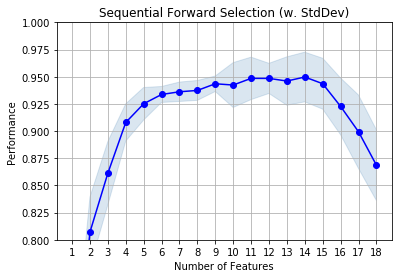

In [240]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [241]:
colPositions = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17]

In [242]:
vehicle_df.columns[colPositions]

Index(['compactness', 'circularity', 'distance_circularity',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

Backward Elimination
-------------------------------

In [243]:
sfs1 = SFS(knn_Model, 
           k_features=2, 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=4)

In [244]:
sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    1.0s finished

[2020-01-04 14:54:24] Features: 17/2 -- score: 0.8993992550762946[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2020-01-04 14:54:25] Features: 16/2 -- score: 0.922714165565301[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_job

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=KNeighborsClassifier(algorithm='auto',
                                                         leaf_size=30,
                                                         metric='minkowski',
                                                         metric_params=None,
                                                         n_jobs=None,
                                                         n_neighbors=3, p=2,
                                                         weights='uniform'),
                          floating=True, forward=False, k_features=2, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=2)

In [245]:
sfs1.subsets_

{18: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.81463415, 0.89162562, 0.87192118, 0.89655172]),
  'avg_score': 0.8686831671272378,
  'feature_names': ('compactness',
   'circularity',
   'distance_circularity',
   'radius_ratio',
   'pr.axis_aspect_ratio',
   'max.length_aspect_ratio',
   'scatter_ratio',
   'elongatedness',
   'pr.axis_rectangularity',
   'max.length_rectangularity',
   'scaled_variance',
   'scaled_variance.1',
   'scaled_radius_of_gyration',
   'scaled_radius_of_gyration.1',
   'skewness_about',
   'skewness_about.1',
   'skewness_about.2',
   'hollows_ratio')},
 17: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.84390244, 0.92118227, 0.90147783, 0.93103448]),
  'avg_score': 0.8993992550762946,
  'feature_names': ('compactness',
   'circularity',
   'distan

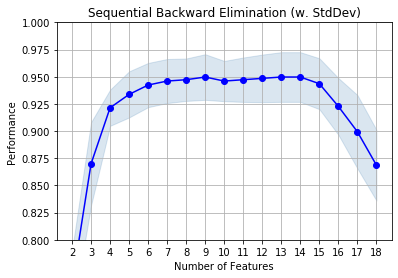

In [246]:
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Elimination (w. StdDev)')
plt.grid()
plt.show()

In [247]:
colPositions = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17]

In [248]:
vehicle_df.columns[colPositions]

Index(['compactness', 'circularity', 'distance_circularity',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio'],
      dtype='object')

Observations from Feature Selection
----------------------------------------------------

 From both forward selection and backward elimination, the following features are important for analysis. They are 
 
 1. compactness, 
 
 2. circularity, 
 
 3. distance_circularity,
 
 4. pr.axis_aspect_ratio,
 
 5. max.length_aspect_ratio,
 
 6. scatter_ratio,
 
 7. elongatedness,
 
 8. pr.axis_rectangularity,
 
 9. max.length_rectangularity,
 
 10. scaled_radius_of_gyration.1,
 
 11. skewness_about,
 
 12. skewness_about.1,
 
 13. skewness_about.2,
 
 14. hollows_ratio
 
 Because when these features are considered for sample KNN model, the accuracy score is maintained almost constant value. When 
 other features are also considered along with above features, the accuracy started decreasing.

In [249]:
new_vehicle_df = vehicle_df[['compactness', 'circularity', 'distance_circularity',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'skewness_about', 'skewness_about.1', 'skewness_about.2',
       'hollows_ratio', 'class']]

In [250]:
new_vehicle_df.head()

,compactness,circularity,distance_circularity,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,6.0,10.0,199.0,207,2
5,107,44.0,106.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,5.0,9.0,181.0,183,0


In [251]:
new_vehicle_df.shape

(814, 17)

# Q3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) 

In [252]:
X = new_vehicle_df.drop('class', axis = 1)

y = new_vehicle_df['class']

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [254]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

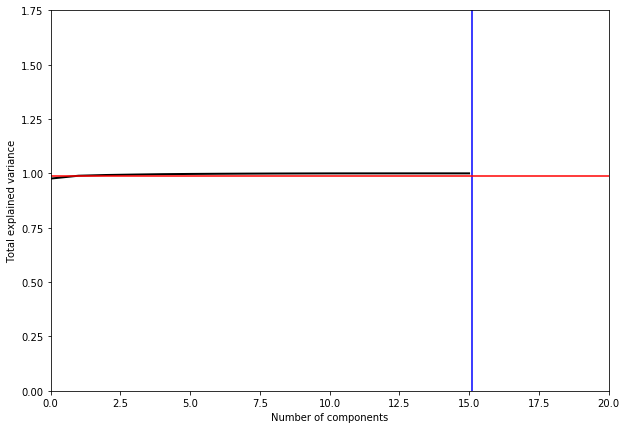

In [255]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 20, 2)
plt.yticks(np.arange(0, 2, 0.25))

plt.axvline(15.1, c='b')
plt.axhline(0.99, c='r')

plt.show()

Observations
-------------------

1. From the above plot out of 18 independent features, 16 features can able to explain more than 95% of the variance. In this case the variance explained by new dimensions given by PCA is almost equal to 100% or Total variance.

Get New Dimensions
------------------------------

In [256]:
pca = PCA(n_components = 16)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [257]:
X_pca = pca.transform(X)

In [258]:
X_pca.shape

(814, 16)

In [259]:
pca.components_

array([[ 3.57529231e-02,  2.80965859e-02,  7.54351410e-02,
         5.53253834e-03,  5.08632774e-03,  1.78245879e-01,
        -4.03580325e-02,  1.38118143e-02,  6.33679308e-02,
         1.62088000e-01,  9.52897200e-01,  1.42070855e-01,
         1.76428358e-03,  9.59329540e-03, -3.10049067e-04,
         3.71251098e-03],
       [ 4.75799663e-02, -1.26522062e-01,  1.93637107e-02,
         6.96176029e-03, -8.21395611e-03,  2.07824779e-03,
        -5.31623658e-03, -4.63710706e-04, -2.81127703e-01,
         1.60578597e-02,  1.48044181e-01, -9.01915679e-01,
        -4.00951279e-02,  1.78681938e-01,  1.24929877e-01,
         1.31919250e-01],
       [ 2.17673072e-01,  9.60819086e-02,  4.95127925e-01,
         2.39965647e-01,  1.01324264e-01,  1.14317751e-01,
        -1.08194518e-01,  4.08012427e-03,  2.90466505e-01,
         4.23874780e-02, -1.15681454e-01,  5.34566446e-02,
         6.95864221e-02,  7.69368154e-02,  3.96787716e-01,
         5.78778313e-01],
       [-1.30706694e-01, -2.14236360e

In [260]:
pca.explained_variance_

array([3.37032678e+04, 4.52769416e+02, 1.16172952e+02, 7.00453884e+01,
       5.98844323e+01, 3.87635273e+01, 2.71990010e+01, 2.18683422e+01,
       1.66129607e+01, 1.10027233e+01, 9.26152913e+00, 2.43581998e+00,
       1.25996864e+00, 1.22699159e+00, 6.22175951e-01, 1.06271403e-01])

In [261]:
pca.explained_variance_ratio_

array([9.75986925e-01, 1.31114002e-02, 3.36416288e-03, 2.02839035e-03,
       1.73414707e-03, 1.12252308e-03, 7.87634884e-04, 6.33268447e-04,
       4.81081910e-04, 3.18619375e-04, 2.68197475e-04, 7.05370314e-05,
       3.64864597e-05, 3.55315027e-05, 1.80171133e-05, 3.07743156e-06])

In [262]:
np.cumsum(pca.explained_variance_ratio_)

array([0.97598692, 0.98909832, 0.99246249, 0.99449088, 0.99622503,
       0.99734755, 0.99813518, 0.99876845, 0.99924953, 0.99956815,
       0.99983635, 0.99990689, 0.99994337, 0.99997891, 0.99999692,
       1.        ])

Observations
-------------------

From the above

1. Out of 16 PCA components, the first component itself explains 97% of the total variance and the remaining components explians the remaining 3% of the variance.

# Q4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy

In [263]:
X = new_vehicle_df.drop('class', axis = 1)

y = new_vehicle_df['class']

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [265]:
svc_model = SVC() # C= .1, kernel='linear', gamma= 1
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [266]:
svc_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [267]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.44081632653061226


Using Grid Search
--------------------------

In [268]:
C_values = [0.01, 0.05, 0.5, 1]

In [269]:
gamma_values = [1, 0.1, 0.01, 0.001, 0.0001]

In [270]:
kernel_values = ['linear', 'rbf']

In [271]:
param_grid = {
                  'C': C_values,  
                  'gamma': gamma_values, 
                  'kernel': kernel_values
             }  

In [272]:
grid = GridSearchCV(svc_model, param_grid, refit = True, verbose = 3)

In [273]:
grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.895, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.889, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ...... C=0.01, gamma=1, kernel=linear, score=0.878, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.539, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.545, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.545, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] .... C=0.0

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   26.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [274]:
print(grid.best_params_) 

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [275]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [276]:
grid.best_score_

0.8927943760984183

In [277]:
svc_model = SVC(C=1, kernel='linear', gamma=1)

In [278]:
svc_model.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [279]:
prediction = svc_model.predict(X_test)

In [280]:
svc_model.score(X_train, y_train)

0.9472759226713533

In [281]:
svc_model.score(X_test, y_test)

0.8734693877551021